In [1]:
# project: p7
# submitter: alee88
# partner: none
# hours: 10

In [2]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import collections
import sqlite3

In [3]:
f = open("wi.html", encoding = "utf-8")
wi_html = f.read()
f.close()
p_ind = wi_html.find("<p>")


In [4]:
#q1
wi_html[p_ind : p_ind + 500]

'<p>The U.S. state of <a href="/wiki/Wisconsin" title="Wisconsin">Wisconsin</a> is divided into 72 <a href="/wiki/County_(United_States)" title="County (United States)">counties</a>. The land that eventually became Wisconsin was transferred from British to American control with the 1783 signing of the <a href="/wiki/Treaty_of_Paris_(1783)" title="Treaty of Paris (1783)">Treaty of Paris</a>.<sup id="cite_ref-HistoryBuffaloPepinCounties_1-0" class="reference"><a href="#cite_note-HistoryBuffaloPepin'

In [5]:
#q2
doc = BeautifulSoup(wi_html, "html.parser")
doc.find("p").text

"The U.S. state of Wisconsin is divided into 72 counties. The land that eventually became Wisconsin was transferred from British to American control with the 1783 signing of the Treaty of Paris.[1] It was an unorganized part of the Northwest Territory until 1802 when all of the land from St. Louis north to the Canadian border was organized as St. Clair County.[1]  When Illinois was admitted to the union in 1818, Wisconsin became part of the Territory of Michigan and divided into two counties: Brown County in the northeast along Lake Michigan and Crawford County in the southwest along the Mississippi River.[1] Iowa County was formed in 1829 from the Crawford County land south of the Wisconsin River.[1] Brown County's southern portion was used to form Milwaukee County in 1834.[1] The state of Wisconsin was created from Wisconsin Territory on May 29, 1848, with 28 counties.\n"

In [6]:
#q3
len(doc.find_all("table"))

4

In [7]:
#q4
table_length = []
tables = doc.find_all("table")
for table in tables:
    table_body = table.find("tbody")
    table_length.append(len(table_body.find_all("tr")))

table_length

[8, 73, 5, 10]

In [8]:
#q5

s = doc.find_all("table")[1].find("tr").find_all("th")

column_lst = []
for item in s:
    column_name = item.text.split("[")[0].replace(" ", "").replace(".", "").strip()
    column_lst.append(column_name)

column_lst

['County',
 'FIPScode',
 'Countyseat',
 'Est',
 'Formedfrom',
 'Etymology',
 'Population',
 'Area',
 'Map']

In [9]:
def county_tr_to_dict(row): 
    global column_lst
    county_idx=column_lst.index("County")
    fip_idx=column_lst.index("FIPScode")
    est_idx=column_lst.index("Est")
    pop_idx=column_lst.index("Population")
    area_idx=column_lst.index("Area")
    a=row.find_all(['th','td'])
    results = {}
    results['FIPScode'] = str(a[fip_idx].text.strip())
    results['County'] = str(a[county_idx].text.strip())
    results['Est'] = int(str(a[est_idx].text.strip()))
    results['Population'] = int(str(a[pop_idx].text.strip()).replace(",",""))
    results['Area'] = float(str(a[area_idx].text.split("s")[0].strip()).replace(",",""))
    return results

counties_lst=[]
for row in tables[1].find_all('tr')[1:]:
    line=county_tr_to_dict(row)
    counties_lst.append(line)
counties_lst

counties_df = pd.DataFrame(counties_lst)
counties_df

,FIPScode,County,Est,Population,Area
0,001,Adams County,1848,20875,645.65
1,003,Ashland County,1860,16157,1045.04
2,005,Barron County,1859,45870,862.71
3,007,Bayfield County,1845,15014,1477.86
4,009,Brown County,1818,248007,529.71
...,...,...,...,...,...
67,133,Waukesha County,1846,389891,549.57
68,135,Waupaca County,1851,52410,747.71
69,137,Waushara County,1851,24496,626.15
70,139,Winnebago County,1840,166994,434.49


In [10]:
#q6
counties_lst[0]

{'FIPScode': '001',
 'County': 'Adams County',
 'Est': 1848,
 'Population': 20875,
 'Area': 645.65}

In [11]:
fips_lookup = {}

for county in range(len(counties_lst)):
    fips_lookup[counties_lst[county]["FIPScode"]] = counties_lst[county]["County"]
    

In [12]:
#q7
fips_lookup

{'001': 'Adams County',
 '003': 'Ashland County',
 '005': 'Barron County',
 '007': 'Bayfield County',
 '009': 'Brown County',
 '011': 'Buffalo County',
 '013': 'Burnett County',
 '015': 'Calumet County',
 '017': 'Chippewa County',
 '019': 'Clark County',
 '021': 'Columbia County',
 '023': 'Crawford County',
 '025': 'Dane County',
 '027': 'Dodge County',
 '029': 'Door County',
 '031': 'Douglas County',
 '033': 'Dunn County',
 '035': 'Eau Claire County',
 '037': 'Florence County',
 '039': 'Fond du Lac County',
 '041': 'Forest County',
 '043': 'Grant County',
 '045': 'Green County',
 '047': 'Green Lake County',
 '049': 'Iowa County',
 '051': 'Iron County',
 '053': 'Jackson County',
 '055': 'Jefferson County',
 '057': 'Juneau County',
 '059': 'Kenosha County',
 '061': 'Kewaunee County',
 '063': 'La Crosse County',
 '065': 'Lafayette County',
 '067': 'Langlade County',
 '069': 'Lincoln County',
 '071': 'Manitowoc County',
 '073': 'Marathon County',
 '075': 'Marinette County',
 '077': 'Marqu

In [13]:
covid_df = pd.read_csv("wi-covid.csv", converters = {"GEOID": str})


id_lst = []
for i in range(len(covid_df)):
   curr_id = covid_df["GEOID"][i][2:5]
   id_lst.append(fips_lookup[curr_id])

covid_df["County"]  = id_lst

covid_df

,GEOID,POSITIVE,DEATHS,HOSP_YES,County
0,55009940002,555,NaN,17.0,Brown County
1,55009001600,880,10.0,67.0,Brown County
2,55009001801,616,9.0,31.0,Brown County
3,55009001802,514,NaN,9.0,Brown County
4,55009002001,1141,19.0,74.0,Brown County
...,...,...,...,...,...
1387,55043960800,297,NaN,22.0,Grant County
1388,55043960100,277,9.0,22.0,Grant County
1389,55043960500,273,NaN,17.0,Grant County
1390,55043961100,499,11.0,31.0,Grant County


In [14]:
#q8
dict(covid_df.value_counts("County"))

{'Milwaukee County': 296,
 'Dane County': 105,
 'Waukesha County': 86,
 'Brown County': 54,
 'Racine County': 44,
 'Winnebago County': 41,
 'Outagamie County': 40,
 'Rock County': 38,
 'Kenosha County': 35,
 'Washington County': 28,
 'Marathon County': 27,
 'Sheboygan County': 26,
 'La Crosse County': 25,
 'Walworth County': 22,
 'Eau Claire County': 20,
 'Fond du Lac County': 20,
 'Dodge County': 20,
 'Jefferson County': 20,
 'Manitowoc County': 19,
 'Ozaukee County': 18,
 'Wood County': 17,
 'St. Croix County': 14,
 'Oneida County': 14,
 'Portage County': 14,
 'Sauk County': 13,
 'Grant County': 12,
 'Marinette County': 12,
 'Douglas County': 12,
 'Columbia County': 12,
 'Waupaca County': 12,
 'Shawano County': 11,
 'Calumet County': 11,
 'Chippewa County': 11,
 'Lincoln County': 10,
 'Polk County': 10,
 'Oconto County': 10,
 'Barron County': 10,
 'Door County': 9,
 'Monroe County': 9,
 'Trempealeau County': 8,
 'Green County': 8,
 'Clark County': 8,
 'Dunn County': 8,
 'Pierce Count

In [15]:
import sqlite3
c = sqlite3.connect("wi.db")
counties_df.to_sql("counties", c, if_exists="replace", index=False)
covid_df.to_sql("covid", c, if_exists="replace", index=False)

In [16]:
#q9
set(pd.read_sql("SELECT name FROM sqlite_master", c)["name"])

#set(pd.read_sql("""SELECT Est, County FROM counties WHERE Est > 1890""", c ))

{'counties', 'covid'}

In [17]:
#q10
float(pd.read_sql("""SELECT SUM(Area) FROM counties""", c).iloc[0])

54157.86999999999

In [18]:
#q11
#pd.read_sql("""SELECT County FROM covid GROUP BY County""", c)

In [19]:
#q12
#pd.read_sql("""SELECT County, Population FROM counties ORDER BY Population LIMIT 4""", c)["Population"]

In [20]:
#q13
int(pd.read_sql("""SELECT SUM(DEATHS) FROM covid WHERE County = 'Dane County' """, c).iloc[0])

190

In [21]:
#q14
set(pd.read_sql("""SELECT County FROM counties WHERE Est > 1890""", c )["County"])

{'Iron County', 'Menominee County', 'Rusk County', 'Vilas County'}

In [22]:
#q15
#pd.read_sql("""SELECT County, HOSP_YES FROM covid WHERE HOSP_YES """, c)

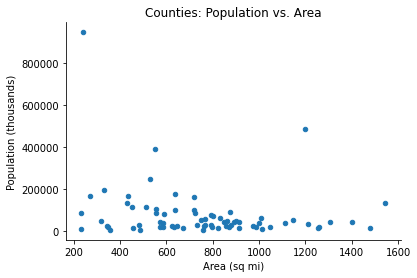

In [23]:
#q16
plt = counties_df.plot.scatter(x = "Area", y = "Population")
plt.set_title("Counties: Population vs. Area")
plt.set_xlabel("Area (sq mi)")
plt.set_ylabel("Population (thousands)")
plt.spines["right"].set_visible(False)
plt.spines["top"].set_visible(False)

Text(0, 0.5, 'Present-Day Counties Established')

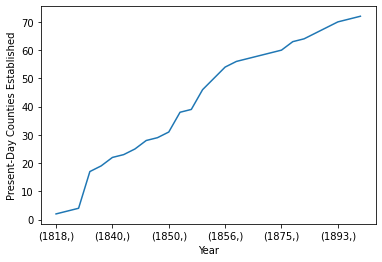

In [24]:
#q17
results = pd.read_sql("""SELECT Est From counties""", c)
plt = results.value_counts().sort_index().cumsum().plot.line()
plt.set_xlabel("Year")
plt.set_ylabel("Present-Day Counties Established")

In [25]:
#q18
pop = pd.read_sql("""SELECT Population FROM counties""", c)
area = pd.read_sql("""SELECT Area FROM counties""", c)
deaths = pd.read_sql("""SELECT Deaths FROM covid""", c)


In [26]:
#q19

In [27]:
#q20